In [ ]:
# download dataset and unzip
# ! wget https://dev.fungismash.secondarymetabolites.org/upload/fungi-28f77eb4-83c8-400e-8b6c-9f06a0c99790/GCA_003184865.1_Asphom1_genomic.zip -P data/
# ! unzip data/GCA_003184865.1_Asphom1_genomic.zip -d data/antismash-result

In [2]:
# load library & data
import pandas as pd
import re
from os import listdir
from Bio import SeqIO
# GET SUMMARY
df = pd.read_html('data/antismash-result/index.html')

In [3]:
# explore resulting list
# df[0-40] individual region
# df[41] summary
#print(len(df_summary))
# df[41]

def mibig(n, mode='region'):
    # MIBIG
    # Start from 42 + index (0-78) x 2
    #n = 78
    # MIBIG PROTOCLUSTER TO REGION
    if mode == 'region':
        x = 42 + (n*2)
    else:
        # MIBIG REGION TO REGION
        x = 42 + (n*2) + 1
    return x

In [97]:
# https://dev.fungismash.secondarymetabolites.org/upload/fungi-28f77eb4-83c8-400e-8b6c-9f06a0c99790/index.html
def print_cluster(index, df, type_gb, term, search = False):
    region = df.Region[index][-5:].split('.')
    region[0] = re.sub("[^0-9]", "", region[0])
    location = df.loc[index, 'gbk']
    path = "data/antismash-result/" + location
    for seq_record in SeqIO.parse(path, "genbank"):
        for seq_feat in seq_record.features:
            if seq_feat.type == type_gb:
                try:
                    for i in seq_feat.qualifiers[term]:
                        
                        if search != False:
                            if search in i:
                                print('index :'+str(index))
                                print(region)
                                print('https://dev.fungismash.secondarymetabolites.org/upload/fungi-28f77eb4-83c8-400e-8b6c-9f06a0c99790/index.html#r'+region[0]+'c'+region[1])    
                                print(i)
                        else:
                            #print('https://dev.fungismash.secondarymetabolites.org/upload/fungi-28f77eb4-83c8-400e-8b6c-9f06a0c99790/index.html#r'+region[0]+'c'+region[1])    
                            print(index, region[0]+"-"+region[1], i) 
                except:
                    pass
    
    return

In [5]:
df_summary = df[41] # list of all simplified

# add path to gbk region
gbk = [f for f in listdir('data/antismash-result/') if f.endswith('.gbk')]
gbk.sort()
gbk.pop(0)

# insert gbk path
df_summary.insert(7, "gbk", gbk, True) 


r = []
c = []
for i in df_summary.index:
    region = df_summary.Region[i][-5:].split('.')
    region[0] = re.sub("[^0-9]", "", region[0])
    r.append(region[0])
    c.append(region[1])

# insert gbk path
df_summary.insert(8, "region", r, True) 
df_summary.insert(9, "cluster", c, True) 
df_summary

,Region,Type,From,To,Most similar known cluster,Most similar known cluster.1,Similarity,gbk,region,cluster
0,Region&nbsp1.1,NRPS-like,436925,476824,NaN,NaN,NaN,KZ824267.1.region001.gbk,1,1
1,Region&nbsp1.2,"NRPS,terpene",508783,549788,NaN,NaN,NaN,KZ824267.1.region002.gbk,1,2
2,Region&nbsp1.3,NRPS,677184,724647,NaN,NaN,NaN,KZ824267.1.region003.gbk,1,3
3,Region&nbsp1.4,NRPS-like,1145545,1189943,NaN,NaN,NaN,KZ824267.1.region004.gbk,1,4
4,Region&nbsp1.5,terpene,1317169,1339303,NaN,NaN,NaN,KZ824267.1.region005.gbk,1,5
...,...,...,...,...,...,...,...,...,...,...
74,Region&nbsp73.2,NRPS-like,76174,113391,NaN,NaN,NaN,KZ824339.1.region002.gbk,73,2
75,Region&nbsp85.1,T1PKS,25348,59154,monacolin K,Polyketide,33%,KZ824351.1.region001.gbk,85,1
76,Region&nbsp95.1,NRPS,632,43824,NaN,NaN,NaN,KZ824361.1.region001.gbk,95,1
77,Region&nbsp98.1,NRPS,1,39059,aspercryptins,NRP,40%,KZ824364.1.region001.gbk,98,1


In [12]:
# statistics
df_summary.region.describe()

count     79
unique    41
top        1
freq       6
Name: region, dtype: object

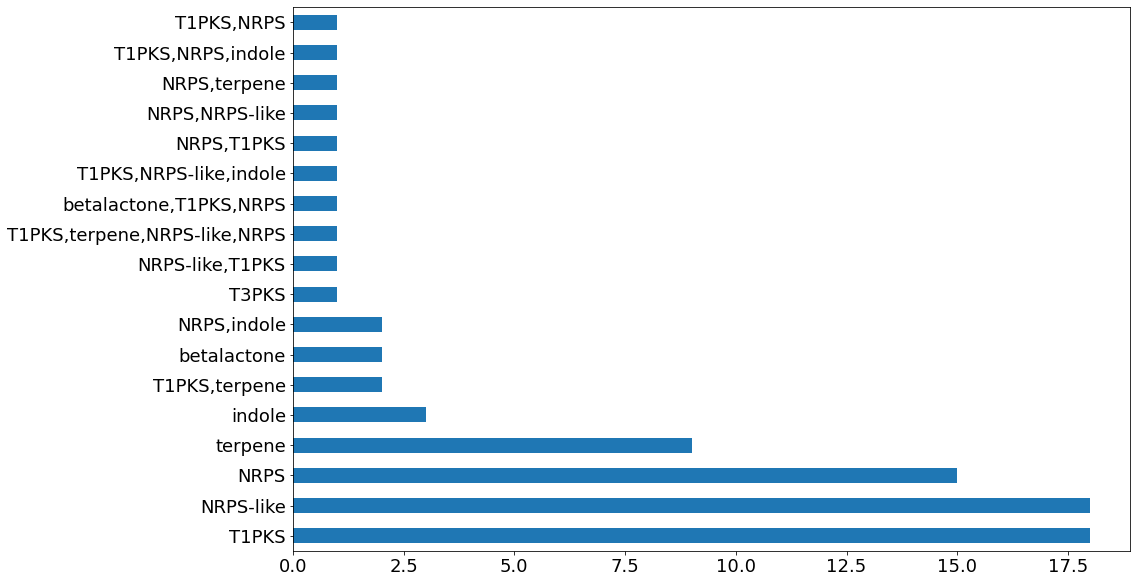

In [31]:
df_summary.Type.value_counts().plot(kind='barh')

fig = df_summary.Type.value_counts().plot(kind='barh',  figsize=(15, 10), fontsize=18).get_figure()

fig.savefig('test.png')

In [46]:
# Filter for T1PKS
t1pks = df_summary[df_summary['Type'] == 'T1PKS']
t1pks = t1pks[t1pks['Similarity'] != '100%']
t1pks

,Region,Type,From,To,Most similar known cluster,Most similar known cluster.1,Similarity,gbk,region,cluster
5,Region&nbsp1.6,T1PKS,1845567,1893829,NaN,NaN,NaN,KZ824267.1.region006.gbk,1,6
8,Region&nbsp2.3,T1PKS,439045,486192,NaN,NaN,NaN,KZ824268.1.region003.gbk,2,3
17,Region&nbsp4.5,T1PKS,1342463,1378538,neosartorin,Polyketide,57%,KZ824270.1.region005.gbk,4,5
21,Region&nbsp6.4,T1PKS,931411,979470,NaN,NaN,NaN,KZ824272.1.region004.gbk,6,4
23,Region&nbsp9.1,T1PKS,327024,375598,NaN,NaN,NaN,KZ824275.1.region001.gbk,9,1
28,Region&nbsp12.1,T1PKS,643222,684146,NaN,NaN,NaN,KZ824278.1.region001.gbk,12,1
29,Region&nbsp13.1,T1PKS,135158,180413,patulin,Polyketide:Iterative type I,66%,KZ824279.1.region001.gbk,13,1
30,Region&nbsp14.1,T1PKS,13863,61566,oxaleimide C,NRP + Polyketide,35%,KZ824280.1.region001.gbk,14,1
42,Region&nbsp20.3,T1PKS,258970,306744,NaN,NaN,NaN,KZ824286.1.region003.gbk,20,3
50,Region&nbsp28.1,T1PKS,171418,218949,NaN,NaN,NaN,KZ824294.1.region001.gbk,28,1


In [98]:
# extract index
index = df_summary.index.tolist()

# Find Phenylalanine related genes
for i in index:
    print_cluster(i, df_summary, "CDS", 'product', 'phenylalanine')

index :51
['30', '1']
https://dev.fungismash.secondarymetabolites.org/upload/fungi-28f77eb4-83c8-400e-8b6c-9f06a0c99790/index.html#r30c1
phenylalanine ammonia-lyase
index :68
['68', '2']
https://dev.fungismash.secondarymetabolites.org/upload/fungi-28f77eb4-83c8-400e-8b6c-9f06a0c99790/index.html#r68c2
phenylalanine ammonia-lyase


In [106]:
# extract index
index = [51, 68]

# print functions in cluster
for i in index:
    print_cluster(i, df_summary, "CDS", 'gene_functions')

51 30-1 biosynthetic (rule-based-clusters) indole: dmat
51 30-1 biosynthetic-additional (rule-based-clusters) p450
51 30-1 biosynthetic-additional (smcogs) SMCOG1034:cytochrome P450 (Score: 283.1; E-value: 6.9e-86)
68 68-2 biosynthetic-additional (rule-based-clusters) Peptidase_S8
68 68-2 biosynthetic-additional (smcogs) SMCOG1075:alkaline serine protease, subtilase family (Score: 164.8; E-value: 6.8e-50)
68 68-2 biosynthetic-additional (rule-based-clusters) Abhydrolase_6
68 68-2 biosynthetic (rule-based-clusters) T1PKS: itr_KS
68 68-2 biosynthetic (rule-based-clusters) T1PKS: PKS_AT
68 68-2 biosynthetic-additional (rule-based-clusters) PP-binding
68 68-2 biosynthetic-additional (rule-based-clusters) adh_short
68 68-2 biosynthetic-additional (smcogs) SMCOG1021:malonyl CoA-acyl carrier protein transacylase (Score: 121.7; E-value: 6.4e-37)
68 68-2 biosynthetic-additional (rule-based-clusters) AMP-binding
68 68-2 biosynthetic-additional (smcogs) SMCOG1002:AMP-dependent synthetase and liga

In [107]:
# extract index
index = [68]

# print functions in cluster
for i in index:
    print_cluster(i, df_summary, "PFAM_domain", 'description')

68 68-2 Subtilase family
68 68-2 Aromatic amino acid lyase
68 68-2 Thioesterase domain
68 68-2 Methyltransferase domain
68 68-2 Beta-ketoacyl synthase, N-terminal domain
68 68-2 Beta-ketoacyl synthase, C-terminal domain
68 68-2 Ketoacyl-synthetase C-terminal extension
68 68-2 Acyl transferase domain
68 68-2 Polyketide synthase dehydratase
68 68-2 Methyltransferase domain
68 68-2 KR domain
68 68-2 Phosphopantetheine attachment site
68 68-2 AMP-binding enzyme
68 68-2 AMP-binding enzyme C-terminal domain
68 68-2 Transmembrane amino acid transporter protein
68 68-2 Domain of unknown function (DUF3328)
68 68-2 Domain of unknown function (DUF3328)
68 68-2 Domain of unknown function (DUF3328)
68 68-2 ABC-2 type transporter
68 68-2 ABC transporter
68 68-2 CDR ABC transporter
68 68-2 ABC-2 type transporter
68 68-2 ABC transporter
68 68-2 ABC-transporter N-terminal


In [104]:
# compare MIBIG for interesting cluster
df[mibig(68)]

,Reference,T1PKS,Similarity score,Type,Compound(s),Organism
0,BGC0000046.1,NaN,0.33,Polyketide,depudecin,Alternaria brassicicola
1,BGC0001068.1,NaN,0.30,"Terpene, Polyketide",pyripyropene A,unidentified unclassified sequences.
2,BGC0001858.1,NaN,0.27,Polyketide,"alternapyrone B, alternapyrone C, alternapyron...",Parastagonospora nodorum SN15
3,BGC0001280.1,NaN,0.27,Polyketide,"betaenone C, betaenone A",Phoma betae
4,BGC0001264.1,NaN,0.27,Polyketide,"betaenone A, betaenone B, betaenone C",Phoma betae
5,BGC0002067.1,NaN,0.23,"NRP, Polyketide",atpenin B,Penicillium oxalicum 114-2
6,BGC0001141.1,NaN,0.23,Polyketide,4-epi-15-epi-brefeldin A,Penicillium brefeldianum
7,BGC0001402.1,NaN,0.22,NRP,"cyclochlorotine, hydroxy-cyclochlorotine, cycl...",Talaromyces islandicus
8,BGC0001254.1,NaN,0.22,Polyketide,ACT-Toxin II,Alternaria alternata
9,BGC0000003.1,NaN,0.22,Polyketide,AF-toxin,Alternaria alternata
